# Check How Pomeroy is merging

In [39]:
from numpy.random import seed
seed(1)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

from sklearn.metrics import log_loss, classification_report, confusion_matrix, mean_squared_error

#path = 'ncaam-march-mania-2021/MDataFiles_Stage1/'
path = 'ncaam-march-mania-2021/MDataFiles_Stage2/'

In [2]:
"""
reg_results = pd.read_csv(path+"MRegularSeasonCompactResults.csv")

reg_results['Score_Diff'] = reg_results['WScore'] - reg_results['LScore']

reg_results.drop(['WLoc','NumOT'],axis=1, inplace=True)

num_win = reg_results.groupby(['Season', 'WTeamID']).count()
num_win = num_win.reset_index()[['Season', 'WTeamID', 'DayNum']].rename(columns={"DayNum": "NumWins", "WTeamID": "TeamID"})

num_loss = reg_results.groupby(['Season', 'LTeamID']).count()
num_loss = num_loss.reset_index()[['Season', 'LTeamID', 'DayNum']].rename(columns={"DayNum": "NumLosses", "LTeamID": "TeamID"})

scoring_win = reg_results.groupby(['Season', 'WTeamID']).mean().reset_index()
scoring_win = scoring_win[['Season','WTeamID','Score_Diff']].rename(columns={'WTeamID':'TeamID','Score_Diff':'Win_Score_Diff'})

scoring_loss = reg_results.groupby(['Season', 'LTeamID']).mean().reset_index()
scoring_loss = scoring_loss[['Season','LTeamID','Score_Diff']].rename(columns={'LTeamID':'TeamID','Score_Diff':'Loss_Score_Diff'})

df_features_season_w = reg_results.groupby(['Season', 'WTeamID']).count().reset_index()[['Season', 'WTeamID']].rename(columns={"WTeamID": "TeamID"})
df_features_season_l = reg_results.groupby(['Season', 'LTeamID']).count().reset_index()[['Season', 'LTeamID']].rename(columns={"LTeamID": "TeamID"})

df_features_season = pd.concat([df_features_season_w, df_features_season_l], 0).drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop=True)

df_features_season = df_features_season.merge(num_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(num_loss, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(scoring_win, on=['Season', 'TeamID'], how='left')
df_features_season = df_features_season.merge(scoring_loss, on=['Season', 'TeamID'], how='left')

df_features_season['WinRatio'] = df_features_season['NumWins'] / (df_features_season['NumWins'] + df_features_season['NumLosses'])
df_features_season['GapAvg'] = (
    (df_features_season['NumWins'] * df_features_season['Win_Score_Diff'] - 
    df_features_season['NumLosses'] * df_features_season['Loss_Score_Diff'])
    / (df_features_season['NumWins'] + df_features_season['NumLosses'])
)

df_features_season.fillna(0, inplace=True)

df_features_season = df_features_season[df_features_season['Season'] >= 2003].reset_index(drop=True)
"""

df_features_season = pd.read_csv('Detailed_Data.csv')

In [3]:
pomeroy = pd.read_csv('Pomeroy.csv')

In [4]:
df_features_season = pd.merge(
    df_features_season,
    pomeroy,
    how='left',
    left_on=['Season', 'TeamID'],
    right_on=['Season', 'TeamID']
)

In [5]:
df_features_season[df_features_season['Rank'].isnull()]

,Season,TeamID,NumWins,NumLosses,Win_Score_Diff,Loss_Score_Diff,WinRatio,GapAvg,FGM,FGA,...,TO,Stl,Blk,PF,Rank,AdjEM,AdjO,AdjD,Luck,ScheduleRating
1765,2008,1223,1.0,9.0,7.000000,20.555556,0.100000,-17.800000,27.111111,60.222222,...,19.722222,8.277778,2.944444,17.222222,NaN,NaN,NaN,NaN,NaN,NaN
2195,2009,1315,5.0,10.0,4.800000,18.700000,0.333333,-10.866667,21.950000,49.200000,...,14.600000,5.300000,2.500000,17.900000,NaN,NaN,NaN,NaN,NaN,NaN
2249,2009,1370,13.0,8.0,12.076923,13.000000,0.619048,2.523810,25.302885,57.086538,...,12.163462,9.923077,2.543269,17.817308,NaN,NaN,NaN,NaN,NaN,NaN
2256,2009,1377,5.0,7.0,22.200000,12.857143,0.416667,1.750000,29.485714,61.042857,...,13.785714,5.728571,5.542857,15.914286,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
upsets = pd.read_csv('Upsets.csv')

In [7]:
upsets

,Season,TeamID,Upsets
0,2002,1102,6
1,2002,1103,8
2,2002,1104,5
3,2002,1105,1
4,2002,1106,4
...,...,...,...
6050,2020,1462,3
6051,2020,1464,4
6052,2020,1465,1
6053,2020,1466,2


In [8]:
df_features_season = pd.merge(
    df_features_season,
    upsets,
    how='left',
    left_on=['Season', 'TeamID'],
    right_on=['Season', 'TeamID']
)

In [9]:
df_features_season[df_features_season['Season']==2021]

,Season,TeamID,NumWins,NumLosses,Win_Score_Diff,Loss_Score_Diff,WinRatio,GapAvg,FGM,FGA,...,Stl,Blk,PF,Rank,AdjEM,AdjO,AdjD,Luck,ScheduleRating,Upsets
6187,2021,1101,19.0,4.0,19.157895,7.250000,0.826087,14.565217,25.921053,58.335526,...,8.223684,2.901316,7.914474,86.0,10.18,103.2,93.0,-0.027,-8.09,NaN
6188,2021,1102,5.0,20.0,6.400000,18.100000,0.200000,-13.200000,21.675000,47.325000,...,7.725000,2.675000,4.275000,328.0,-15.98,94.6,110.5,0.028,4.49,NaN
6189,2021,1103,13.0,8.0,11.846154,9.250000,0.619048,3.809524,26.341346,61.370192,...,4.697115,3.759615,6.730769,104.0,7.92,108.7,100.8,-0.001,4.62,NaN
6190,2021,1104,24.0,6.0,14.375000,8.500000,0.800000,9.800000,25.625000,63.354167,...,8.958333,3.770833,5.083333,8.0,25.07,111.8,86.7,0.031,14.29,NaN
6191,2021,1105,6.0,9.0,9.666667,12.888889,0.400000,-3.866667,23.861111,58.611111,...,5.694444,3.638889,5.777778,348.0,-21.17,84.6,105.8,0.018,-12.52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6529,2021,1467,9.0,9.0,9.222222,10.000000,0.500000,-0.388889,24.111111,53.722222,...,8.000000,3.777778,7.666667,281.0,-10.77,90.9,101.7,0.014,-8.83,NaN
6530,2021,1468,11.0,7.0,13.636364,10.428571,0.611111,4.277778,26.967532,54.305195,...,6.448052,1.993506,2.961039,183.0,-1.22,107.4,108.7,-0.014,-5.66,NaN
6531,2021,1469,6.0,13.0,4.833333,17.692308,0.315789,-10.578947,24.032051,58.198718,...,6.897436,1.948718,4.051282,331.0,-16.40,90.9,107.3,0.070,-3.56,NaN
6532,2021,1470,5.0,10.0,12.800000,12.800000,0.333333,-4.266667,22.500000,50.850000,...,6.600000,2.200000,8.800000,263.0,-9.42,96.7,106.1,-0.052,-0.33,NaN


In [10]:
df_features_season.fillna(0,inplace=True)

In [11]:
tourney_results = pd.read_csv(path+"MNCAATourneyCompactResults.csv")

df = tourney_results.copy()
df = df[df['Season'] >= 2003].reset_index(drop=True)

seeds = pd.read_csv(path+"MNCAATourneySeeds.csv")
seeds['Seed'] = seeds['Seed'].apply(lambda x: int(x[1:3]))

df = df.merge(seeds,how="left",left_on=['Season','WTeamID'],right_on=['Season','TeamID']).rename(columns={'Seed': 'SeedW'})
df = df.merge(seeds,how="left",left_on=['Season','LTeamID'],right_on=['Season','TeamID']).rename(columns={'Seed': 'SeedL'})

df =  df.T.drop_duplicates().T

df = pd.merge(
    df,
    df_features_season,
    how='left',
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsW',
    'NumLosses': 'NumLossesW',
    'Win_Score_Diff': 'GapWinsW',
    'Loss_Score_Diff': 'GapLossesW',
    'WinRatio': 'WinRatioW',
    'GapAvg': 'GapAvgW',
    'FGM':'FGMW',
    'FGA':'FGAW',
    'FGM3':'FGM3W',
    'FGA3':'FGA3W',
    'FTM':'FTMW',
    'FTA':'FTAW',
    'OR':'ORW',
    'DR':'DRW',
    'Ast':'AstW',
    'TO':'TOW',
    'Stl':'StlW',
    'Blk':'BlkW',
    'PF':'PFW',
    'Rank':'RankW',
    'AdjEM':'AdjEMW',
    'AdjO':'AdjOW',
    'AdjD':'AdjDW',
    'Luck':'LuckW',
    'Upsets':'UpsetsW',
    'ScheduleRating':'ScheduleRatingW'
}).drop(columns='TeamID', axis=1)

df = pd.merge(
    df,
    df_features_season,
    how='left',
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsL',
    'NumLosses': 'NumLossesL',
    'Win_Score_Diff': 'GapWinsL',
    'Loss_Score_Diff': 'GapLossesL',
    'WinRatio': 'WinRatioL',
    'GapAvg': 'GapAvgL',
    'FGM':'FGML',
    'FGA':'FGAL',
    'FGM3':'FGM3L',
    'FGA3':'FGA3L',
    'FTM':'FTML',
    'FTA':'FTAL',
    'OR':'ORL',
    'DR':'DRL',
    'Ast':'AstL',
    'TO':'TOL',
    'Stl':'StlL',
    'Blk':'BlkL',
    'PF':'PFL',
    'Rank':'RankL',
    'AdjEM':'AdjEML',
    'AdjO':'AdjOL',
    'AdjD':'AdjDL',
    'Luck':'LuckL',
    'Upsets':'UpsetsL',
    'ScheduleRating':'ScheduleRatingL'
}).drop(columns='TeamID', axis=1)

In [12]:
def add_loosing_matches(win_df):
    win_rename = {
        "WTeamID": "TeamIdA", 
        "WScore" : "ScoreA", 
        "LTeamID" : "TeamIdB",
        "LScore": "ScoreB",
        "SeedW": "SeedA", 
        "SeedL": "SeedB",
        'WinRatioW' : 'WinRatioA',
        'WinRatioL' : 'WinRatioB',
        'GapAvgW' : 'GapAvgA',
        'GapAvgL' : 'GapAvgB',
        'FGMW':'FGMA',
        'FGAW':'FGAA',
        'FGM3W':'FGM3A',
        'FGA3W':'FGA3A',
        'FTMW':'FTMA',
        'FTAW':'FTAA',
        'ORW':'ORA',
        'DRW':'DRA',
        'AstW':'AstA',
        'TOW':'TOA',
        'StlW':'StlA',
        'BlkW':'BlkA',
        'PFW':'PFA',
        'FGML':'FGMB',
        'FGAL':'FGAB',
        'FGM3L':'FGM3B',
        'FGA3L':'FGA3B',
        'FTML':'FTMB',
        'FTAL':'FTAB',
        'ORL':'ORB',
        'DRL':'DRB',
        'AstL':'AstB',
        'TOL':'TOB',
        'StlL':'StlB',
        'BlkL':'BlkB',
        'PFL':'PFB',
        'RankW': 'RankA',
        'AdjEMW': 'AdjEMA',
        'AdjOW': 'AdjOA',
        'AdjDW': 'AdjDA',
        'LuckW': 'LuckA',
        'RankL': 'RankB',
        'AdjEML': 'AdjEMB',
        'AdjOL': 'AdjOB',
        'AdjDL': 'AdjDB',
        'LuckL': 'LuckB',
        'UpsetsW':'UpsetsA',
        'UpsetsL':'UpsetsB',
        'ScheduleRatingW':'ScheduleRatingA',
        'ScheduleRatingL':'ScheduleRatingB',
     }
    
    lose_rename = {
        "WTeamID": "TeamIdB", 
        "WScore" : "ScoreB", 
        "LTeamID" : "TeamIdA",
        "LScore": "ScoreA",
        "SeedW": "SeedB", 
        "SeedL": "SeedA",
        'GapAvgW' : 'GapAvgB',
        'GapAvgL' : 'GapAvgA',
        'WinRatioW' : 'WinRatioB',
        'WinRatioL' : 'WinRatioA',
        'FGMW':'FGMB',
        'FGAW':'FGAB',
        'FGM3W':'FGM3B',
        'FGA3W':'FGA3B',
        'FTAW':'FTAB',
        'FTMW':'FTMB',
        'ORW':'ORB',
        'DRW':'DRB',
        'AstW':'AstB',
        'TOW':'TOB',
        'StlW':'StlB',
        'BlkW':'BlkB',
        'PFW':'PFB',
        'FGML':'FGMA',
        'FGAL':'FGAA',
        'FGM3L':'FGM3A',
        'FGA3L':'FGA3A',
        'FTML':'FTMA',
        'FTAL':'FTAA',
        'ORL':'ORA',
        'DRL':'DRA',
        'AstL':'AstA',
        'TOL':'TOA',
        'StlL':'StlA',
        'BlkL':'BlkA',
        'PFL':'PFA',
        'RankW': 'RankB',
        'AdjEMW': 'AdjEMB',
        'AdjOW': 'AdjOB',
        'AdjDW': 'AdjDB',
        'LuckW': 'LuckB',
        'RankL': 'RankA',
        'AdjEML': 'AdjEMA',
        'AdjOL': 'AdjOA',
        'AdjDL': 'AdjDA',
        'LuckL': 'LuckA',
        'UpsetsW':'UpsetsB',
        'UpsetsL':'UpsetsA',
        'ScheduleRatingW':'ScheduleRatingB',
        'ScheduleRatingL':'ScheduleRatingA',
    }
    
    win_df = win_df.copy()
    lose_df = win_df.copy()
    
    win_df = win_df.rename(columns=win_rename)
    lose_df = lose_df.rename(columns=lose_rename)
    
    return pd.concat([win_df, lose_df], 0, sort=False)

In [13]:
df = add_loosing_matches(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 1114
Data columns (total 62 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Season           2230 non-null   object 
 1   DayNum           2230 non-null   object 
 2   TeamIdA          2230 non-null   object 
 3   ScoreA           2230 non-null   object 
 4   TeamIdB          2230 non-null   object 
 5   ScoreB           2230 non-null   object 
 6   WLoc             2230 non-null   object 
 7   NumOT            2230 non-null   object 
 8   SeedA            2230 non-null   object 
 9   SeedB            2230 non-null   object 
 10  NumWinsW         2230 non-null   float64
 11  NumLossesW       2230 non-null   float64
 12  GapWinsW         2230 non-null   float64
 13  GapLossesW       2230 non-null   float64
 14  WinRatioA        2230 non-null   float64
 15  GapAvgA          2230 non-null   float64
 16  FGMA             2230 non-null   float64
 17  FGAA          

In [14]:
df['SeedDiff'] = df['SeedA'] - df['SeedB']
df['WinRatioDiff'] = df['WinRatioA'] - df['WinRatioB']
df['GapAvgDiff'] = df['GapAvgA'] - df['GapAvgB']

In [15]:
df['ScoreDiff'] = (df['ScoreA'] - df['ScoreB']).astype(float)
df['WinA'] = (df['ScoreDiff'] > 0).astype(int)

In [62]:
features = [
    #'DayNum',
    'SeedA',
    'SeedB',
    'WinRatioA',
    'GapAvgA',
    'WinRatioB',
    'GapAvgB',
#     'OrdinalRankA',
    'RankA',
#    'AdjEMA',
    'AdjOA',
    'AdjDA',
    'LuckA',
    'UpsetsA',
    'ScheduleRatingA',
#    'FGMA',
#    'FTMA',
    'RankB',
#    'AdjEMB',
    'AdjOB',
    'AdjDB',
    'LuckB',
    'ScheduleRatingB',
#    'FGMB',
#    'FTMB',
    'UpsetsB',
#     'OrdinalRankB',
#    'SeedDiff',
#    'WinRatioDiff',
#    'GapAvgDiff'
#     'OrdinalRankDiff',
]

In [51]:
test_df = pd.read_csv(path+"MSampleSubmissionStage2.csv")

In [52]:
test_df['Season'] = test_df['ID'].apply(lambda x: int(x.split('_')[0]))
test_df['TeamIdA'] = test_df['ID'].apply(lambda x: int(x.split('_')[1]))
test_df['TeamIdB'] = test_df['ID'].apply(lambda x: int(x.split('_')[2]))

In [53]:
test_df = pd.merge(
    test_df,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIdA'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsA',
    'NumLosses': 'NumLossesA',
    'Win_Score_Diff': 'GapWinsA',
    'Loss_Score_Diff': 'GapLossesA',
    'WinRatio': 'WinRatioA',
    'GapAvg': 'GapAvgA',
    'Rank':'RankA',
    'AdjEM':'AdjEMA',
    'AdjO':'AdjOA',
    'AdjD':'AdjDA',
    'Luck':'LuckA',
    'FGM':'FGMA',
    'FGA':'FGAA',
    'FGM3':'FGM3A',
    'FGA3':'FGA3A',
    'FTM':'FTMA',
    'OR':'ORA',
    'DR':'DRA',
    'Ast':'AstA',
    'TO':'TOA',
    'Stl':'StlA',
    'Blk':'BlkA',
    'PF':'PFA',
    'Upsets':'UpsetsA',
    'ScheduleRating':'ScheduleRatingA',
}).drop(columns='TeamID', axis=1)

In [54]:
test_df = pd.merge(
    test_df,
    df_features_season,
    how='left',
    left_on=['Season', 'TeamIdB'],
    right_on=['Season', 'TeamID']
).rename(columns={
    'NumWins': 'NumWinsB',
    'NumLosses': 'NumLossesB',
    'Win_Score_Diff': 'GapWinsB',
    'Loss_Score_Diff': 'GapLossesB',
    'WinRatio': 'WinRatioB',
    'GapAvg': 'GapAvgB',
    'Rank':'RankB',
    'AdjEM':'AdjEMB',
    'AdjO':'AdjOB',
    'AdjD':'AdjDB',
    'Luck':'LuckB',
    'FGM':'FGMB',
    'FGA':'FGAB',
    'FGM3':'FGM3B',
    'FGA3':'FGA3B',
    'FTM':'FTMB',
    'OR':'ORB',
    'DR':'DRB',
    'Ast':'AstB',
    'TO':'TOB',
    'Stl':'StlB',
    'Blk':'BlkB',
    'PF':'PFB',
    'Upsets':'UpsetsB',
    'ScheduleRating':'ScheduleRatingB',
}).drop(columns='TeamID', axis=1)

In [55]:
test_df = test_df.merge(seeds,how="left",left_on=['Season','TeamIdA'],right_on=['Season','TeamID']).rename(columns={'Seed': 'SeedA'})
test_df = test_df.merge(seeds,how="left",left_on=['Season','TeamIdB'],right_on=['Season','TeamID']).rename(columns={'Seed': 'SeedB'})

In [56]:
test_df['SeedDiff'] = test_df['SeedA'] - test_df['SeedB']
test_df['WinRatioDiff'] = test_df['WinRatioA'] - test_df['WinRatioB']
test_df['GapAvgDiff'] = test_df['GapAvgA'] - test_df['GapAvgB']

In [57]:
df['ScoreDiff'] = df['ScoreDiff'].astype(float)

In [80]:
def kfold_reg(df, df_test_=None, verbose=0, mode='class'):
    seasons = df['Season'].unique()
    cvs = []
    pred_tests = []
    val_tests = []
    target = "ScoreDiff" if mode == "reg" else "WinA"
            
    for season in seasons[12:]:
        if verbose:
            print(f'\nValidating on season {season}')
            
        scaler = StandardScaler()

        df_train = df[df['Season'] < season].reset_index(drop=True).copy()
        df_val = df[df['Season'] == season].reset_index(drop=True).copy()
        if df_test_ is not None:
            df_test = df_test_.copy()
                
        scaled_df_train = scaler.fit_transform(df_train[features])
        scaled_df_val = scaler.transform(df_val[features])
        if df_test_ is not None:
            scaled_df_test = scaler.transform(df_test[features])
        
        model = Sequential()
        model.add(Dense(32, input_dim=len(features), activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(8, activation='relu'))
        
        if mode=='class':            
            model.add(Dense(1, activation='sigmoid'))
            
            model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])
            model.fit(scaled_df_train,df_train[target],32,50,0)

            pred = model.predict(scaled_df_val,batch_size=32)
            pred = np.apply_along_axis(lambda x: 0.999999 if x == 1 else x,1,pred)
        else:
            model.add(Dense(1, activation='linear'))

            model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['accuracy'])
            model.fit(scaled_df_train,df_train[target],32,50,0)

            pred = np.round(model.predict(scaled_df_val,batch_size=32))

        if df_test_ is not None:
            pred_test = model.predict(scaled_df_test,batch_size=32)   
            pred_tests.append(pred_test)
        
        if mode == 'class':
            loss = log_loss(df_val['WinA'].values, pred)
            results_series = pred.transpose()
            results_series = np.apply_along_axis(lambda x: 1 if x >= 0.5 else 0,0,results_series)
            cvs.append(loss)
        else:
            loss = np.sqrt(mean_squared_error(df_val['ScoreDiff'], pred))
            cvs.append(loss)

        season_df = pd.DataFrame.from_records(pred)
        val_tests.append(season_df)
        
        if verbose:
            print(f'\t -> Scored {loss:.3f}')
            if mode == 'class':
                print(confusion_matrix(df_val[target].values,results_series))
        

    print(f'\n Local CV is {np.mean(cvs):.3f}')
    
    #pred_test = np.mean(pred_tests, 0)
    
    #sub = test_df[['ID', 'Pred']].copy()
    #sub['Pred'] = pred_test
    #file_name = 'submission_'+mode+'.csv'
    #sub.to_csv(file_name, index=False)
    vals = pd.concat(val_tests,ignore_index=True)
    
    return pred_tests, vals

In [87]:
def kfold_2021(df, df_test_=None, verbose=0, mode='class'):
    cvs = []
    pred_tests = []
    val_tests = []
    target = "ScoreDiff" if mode == "reg" else "WinA"
    
    kf = KFold(n_splits=4,shuffle=True)
    count = 1
    for train_index, test_index in kf.split(df):
        if verbose:
            print(f'\nValidating on fold {count}')
            
        scaler = StandardScaler()

        df_train = df.iloc[train_index]
        df_val = df.iloc[test_index]
        if df_test_ is not None:
            df_test = df_test_.copy()
                
        scaled_df_train = scaler.fit_transform(df_train[features])
        scaled_df_val = scaler.transform(df_val[features])
        if df_test_ is not None:
            scaled_df_test = scaler.transform(df_test[features])
        
        model = Sequential()
        model.add(Dense(32, input_dim=len(features), activation='relu'))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(8, activation='relu'))
        
        if mode=='class':            
            model.add(Dense(1, activation='sigmoid'))
            
            model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])
            model.fit(scaled_df_train,df_train[target],32,50,0)

            pred = model.predict(scaled_df_val,batch_size=32)
            pred = np.apply_along_axis(lambda x: 0.999999 if x == 1 else x,1,pred)
        else:
            model.add(Dense(1, activation='linear'))

            model.compile(optimizer='adam',loss='mean_squared_error',metrics = ['accuracy'])
            model.fit(scaled_df_train,df_train[target],32,50,0)

            pred = np.round(model.predict(scaled_df_val,batch_size=32))

        if df_test_ is not None:
            pred_test = model.predict(scaled_df_test,batch_size=32)   
            pred_tests.append(pred_test)
        
        if mode == 'class':
            loss = log_loss(df_val['WinA'].values, pred)
            results_series = pred.transpose()
            results_series = np.apply_along_axis(lambda x: 1 if x >= 0.5 else 0,0,results_series)
            cvs.append(loss)
        else:
            loss = np.sqrt(mean_squared_error(df_val['ScoreDiff'], pred))
            cvs.append(loss)

        season_df = pd.DataFrame.from_records(pred)
        val_tests.append(season_df)
        
        if verbose:
            print(f'\t -> Scored {loss:.3f}')
            if mode == 'class':
                print(confusion_matrix(df_val[target].values,results_series))
        count += 1
        

    print(f'\n Local CV is {np.mean(cvs):.3f}')
    
    #pred_test = np.mean(pred_tests, 0)
    
    #sub = test_df[['ID', 'Pred']].copy()
    #sub['Pred'] = pred_test
    #file_name = 'submission_'+mode+'.csv'
    #sub.to_csv(file_name, index=False)
    vals = pd.concat(val_tests,ignore_index=True)
    
    return pred_tests, vals

In [88]:
pred_tests, vals = kfold_2021(df, test_df, 1,'class')


Validating on fold 1
	 -> Scored 0.516
[[215  81]
 [ 45 217]]

Validating on fold 2
	 -> Scored 0.489
[[209  42]
 [ 74 233]]

Validating on fold 3
	 -> Scored 0.485
[[223  71]
 [ 41 222]]

Validating on fold 4
	 -> Scored 0.474
[[229  45]
 [ 54 229]]

 Local CV is 0.491


In [84]:
pred_tests, vals = kfold_reg(df, test_df, 1,'reg')


Validating on season 2015
	 -> Scored 10.930

Validating on season 2016
	 -> Scored 9.720

Validating on season 2017
	 -> Scored 8.541

Validating on season 2018
	 -> Scored 10.320

Validating on season 2019
	 -> Scored 9.928

 Local CV is 9.888


In [89]:
vals

,0
0,0.957384
1,0.955321
2,0.999721
3,0.580593
4,0.993284
...,...
2225,0.003800
2226,0.003266
2227,0.266098
2228,0.444489


In [90]:
pred_test = np.mean(pred_tests, 0)

In [91]:
pred_test

array([[0.00474503],
       [0.5876557 ],
       [0.01259077],
       ...,
       [0.98342335],
       [0.27074552],
       [0.00150765]], dtype=float32)

In [92]:
sub = test_df[['ID', 'Pred']].copy()
sub['Pred'] = pred_test

In [93]:
sub.to_csv('submission.csv', index=False)

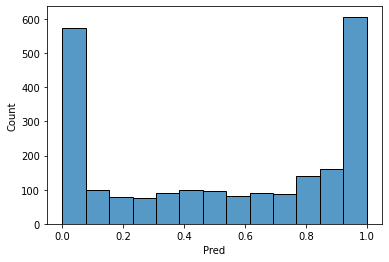

In [94]:
_ = sns.histplot(sub['Pred'])